# Group Project: Determining Diamond Cut Grades Using KNN Classification

**Section 009 Group 2**

**Ziqing Wang**<br>**Anna Tao**<br>**Ruby de Lang**

### 1. Introduction

The 4Cs: cut, clarity, color, and carat weight, are internationally accepted standards for assessing the quality of a diamond.  Diamond cut grade is a pivotal factor in determining the beauty and value of a diamond. Diamonds with an excellent cut exhibit exceptional brilliance, while very good cuts offer slightly lower cost without sacrificing visual appeal. Good cuts have an aesthetic appearance, though they may have reduced sparkle. In contrast, fair and poor cuts exhibit noticeable imperfections, appearing dull and less valuable.

The data set being examined in this project is a tabular data set that reports on the characteristics of diamonds (carat, color, clarity, price …). 
We want to explore the relationships between the quantitative data pieces, and use the KNN classification method to examine whether or not it can predict the cut grade of the diamond.

The columns of the dataset:
* **carat**: a unit of measurement for a diamond's weight, with one carat equal to 200 milligrams.
* **cut**: cut grades of diamonds, measured in five grades (high to low) in this dataset: Ideal, Premium, Very good, Good, Fair.
* **color**: color is graded on a scale from D (colorless) to Z (light yellow or brown), indicating the absence or presence of color in the stone.
* **clarity**: the presence of internal and external flaws or inclusions within a diamond, graded from Flawless (no inclusions) to Included (visible inclusions).
* **depth**: measures the distance from the table to the culet (the bottom of the diamond), influencing the diamond's visual size and light performance.
* **table**: the flat, topmost facet that affects the diamond's overall appearance and brilliance.
* **price**: The price of the diamond, can be determined by various factors.
* **x**: the x-dimension of diamonds.
* **y**: the y-dimension of diamonds.
* **z**: the z-dimension of diamonds.

### 2. Preliminary exploratory data analysis

In [3]:
#install.packages("GGally")
#install.packages("tidyverse")
#install.packages("cowplot")
library(tidyverse)
library(ggplot2)
library(repr)
library(tidymodels)
library(GGally)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

ERROR: Error in library(GGally): there is no package called ‘GGally’


**Reading Data from Online Source Into R**

Before any data analysis/exploration, we must first download the diamond data from the website and read it as a CSV file in Jupyter.
After reading the data, we have 53940 recorded observations.

In [4]:
diamond_data <- read_csv("https://raw.githubusercontent.com/rubydelang/sonar_data/main/diamonds.csv") |>
mutate(cut = as_factor(cut))

#head(diamond_data)
diamond_data

diamond_split <- initial_split(diamond_data, prop = 0.75, strata = cut)
diamond_training <- training(diamond_split)
diamond_testing <- testing(diamond_split)

Rows: 53940 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): cut, color, clarity
dbl (7): carat, depth, table, price, x, y, z

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49


**Checking for Missing Data** 

We want to check for any NA values to make sure the data is consistent through the columns. Since we found no NA values, we still have 53940 observations to work with. 

The 'na_rows' counts for the number of rows containing missing data, and the result of 0 meaning we do not have any missing data in this dataset. Additionally, the dbl factors are correctly showing the minimum and maximum values, so we know they do not contain any missing information, otherwise they will output NA.<br><br>

In [3]:
na_rows <- sum(apply(is.na(diamond_data), 1, any))
na_rows
summary(diamond_data)

[1] 0

     carat               cut           color             clarity         
 Min.   :0.2000   Ideal    :21551   Length:53940       Length:53940      
 1st Qu.:0.4000   Premium  :13791   Class :character   Class :character  
 Median :0.7000   Good     : 4906   Mode  :character   Mode  :character  
 Mean   :0.7979   Very Good:12082                                        
 3rd Qu.:1.0400   Fair     : 1610                                        
 Max.   :5.0100                                                          
     depth           table           price             x         
 Min.   :43.00   Min.   :43.00   Min.   :  326   Min.   : 0.000  
 1st Qu.:61.00   1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710  
 Median :61.80   Median :57.00   Median : 2401   Median : 5.700  
 Mean   :61.75   Mean   :57.46   Mean   : 3933   Mean   : 5.731  
 3rd Qu.:62.50   3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.: 6.540  
 Max.   :79.00   Max.   :95.00   Max.   :18823   Max.   :10.740  
       y            

**Mutating Data**

We want to predict the cut grades in this project. Our target variable is column cut, so we mutate the cut column to be type of fct instead of chr.

In [7]:
mutate_data <- diamond_data |>
    mutate(cut = as_factor(cut))

head(mutate_data) 


carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


**Tidy Data**

Now looking at the graph, each row is a single observation, each column is a single variable, and the column names are meaningful, and each cell contains only a single value. 
Therefore, the data is already tidy so we do not need take any further actions. <br><br>

`summarise()` has grouped output by 'color'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'clarity'. You can override using the
`.groups` argument.


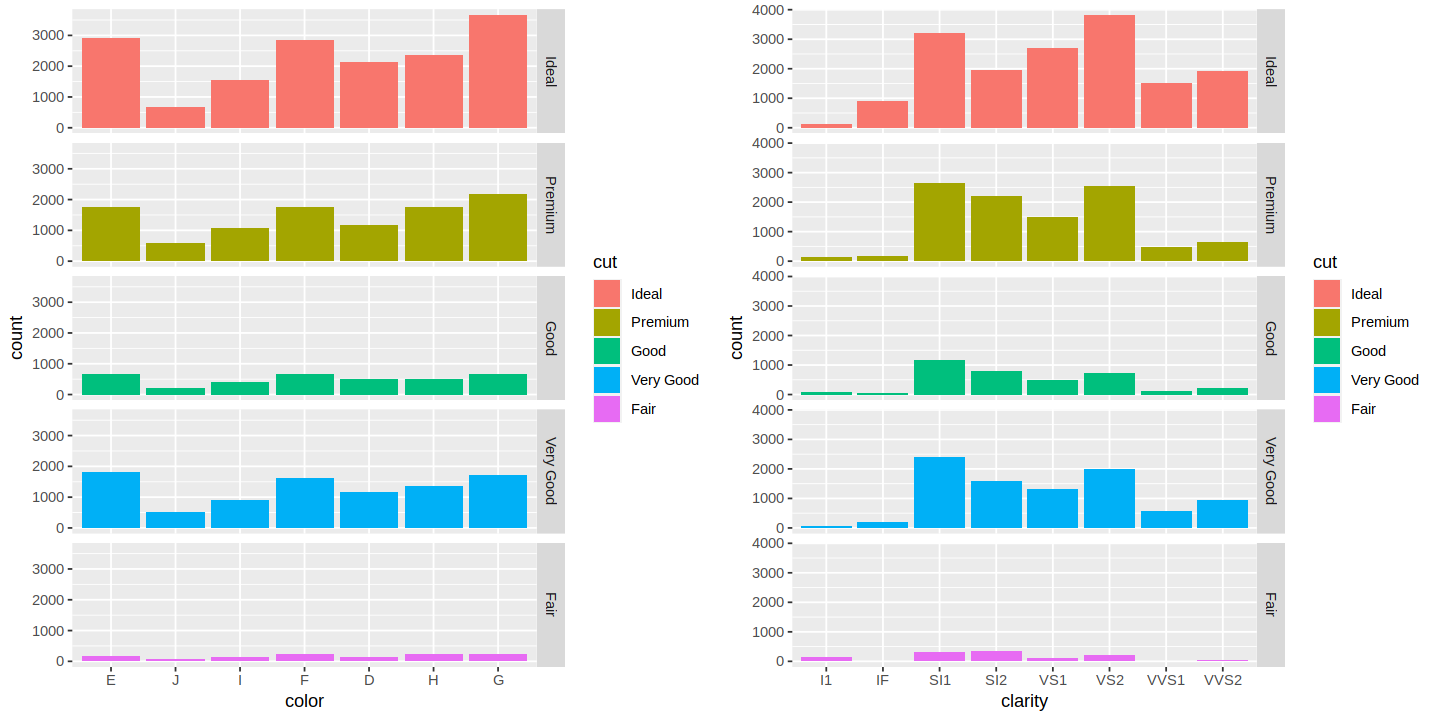

In [33]:
options(repr.plot.width = 12, repr.plot.height = 6)

color_graph <- diamond_training |>
mutate(color = as_factor(color)) |>
group_by(color,cut) |>
summarize(count = n()) |>
ggplot(aes(color, y=count,fill=cut)) +
geom_bar(stat="identity", position="dodge") +
facet_grid(rows = vars(cut))

clarity_graph <- diamond_training |>
mutate(color = as_factor(color)) |>
group_by(clarity,cut) |>
summarize(count = n()) |>
ggplot(aes(x=clarity, y=count,fill=cut)) +
geom_bar(stat="identity", position="dodge") +
facet_grid(rows = vars(cut))

plot_grid(color_graph, clarity_graph, align = "h", ncol = 2)

I'm still trying to interpret these two results above.<br><br>

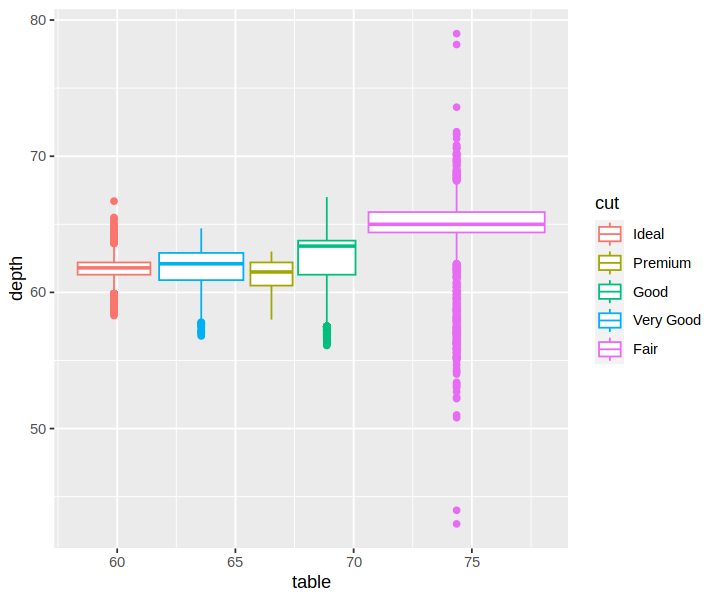

In [30]:
# table_depth_graph <- diamond_training |>
# ggplot(aes(x = depth, y = table, color = cut)) +
# geom_point(alpha = 0.5) +
# facet_grid(rows = vars(cut))

options(repr.plot.width = 6, repr.plot.height = 5)

table_depth_graph <- diamond_training |>
ggplot(aes(x = table, y = depth, color = cut)) +
geom_boxplot()

table_depth_graph

We can see the cut grades are related to these two factors, when the grade is higher, the points are less scattered.<br><br>

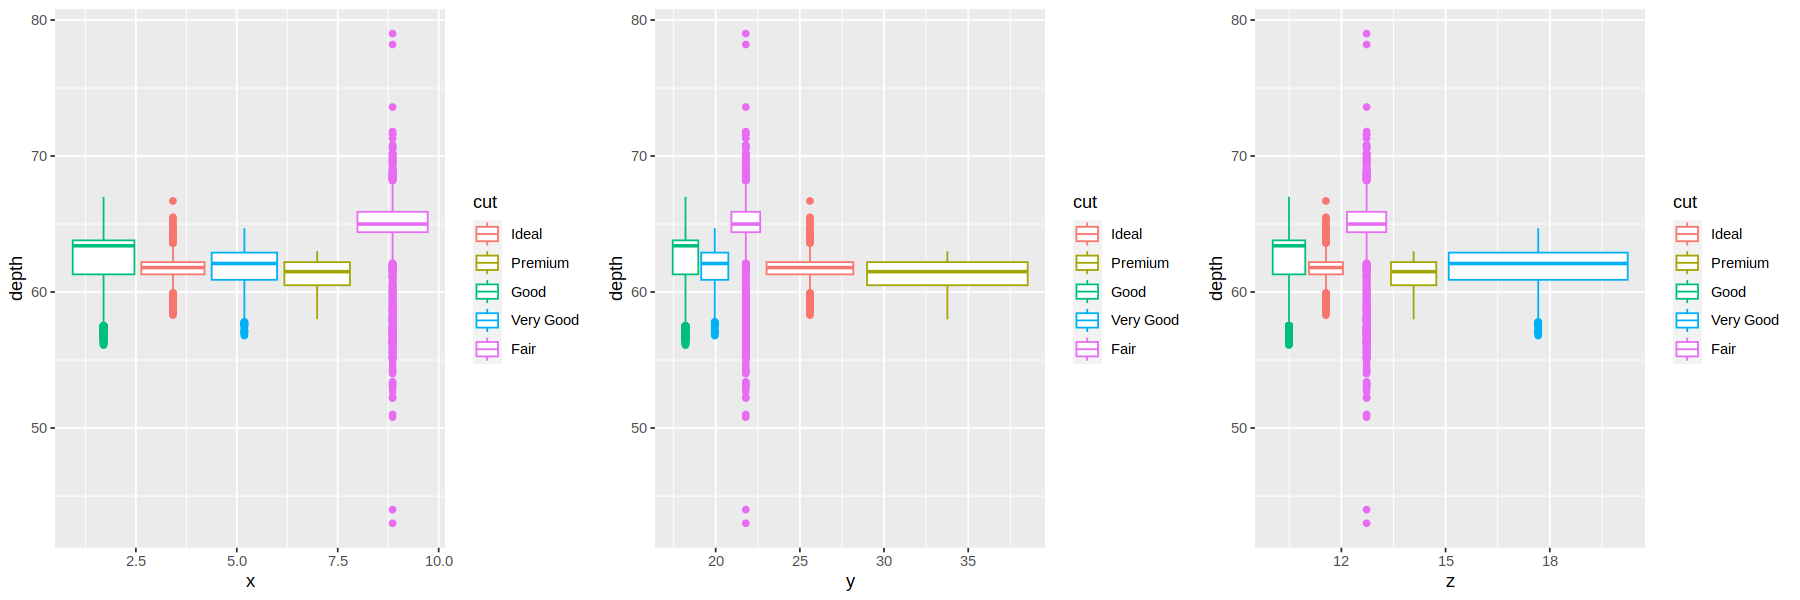

In [26]:
options(repr.plot.width = 15, repr.plot.height = 5)
x_depth_graph <- diamond_training |>
ggplot(aes(x = x, y = depth, color = cut)) +
geom_boxplot()

y_depth_graph <- diamond_training |>
ggplot(aes(x = y, y = depth, color = cut)) +
geom_boxplot()

z_depth_graph <- diamond_training |>
ggplot(aes(x = z, y = depth, color = cut)) +
geom_boxplot()


plot_grid(x_depth_graph, y_depth_graph, z_depth_graph, align = "h", ncol = 3)

### 3. Methods

In this project, we first choose to use x, y, z, table, and depth as the predictors for cut grades. The cut grades are classified by experts based on how well the diamond can reflect light, or how “sparkling” the diamonds are under the light. The five predictos we chosen are all related to the symmetry of the diamond. Also based on the graph we have plotted, it suggests the color may be one of the potential predictors, so we will add color into the predictor list as well. 

### 4 Expected outcomes and significance

### References